In [103]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [105]:
# Read in data
data = pd.read_csv('../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,46,4.8,3.0,1.4,0.3,Iris-setosa
139,140,6.9,3.1,5.4,2.1,Iris-virginica
13,14,4.3,3.0,1.1,0.1,Iris-setosa
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [106]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [107]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [108]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [109]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 1.59609845  0.8862901   2.22889367  1.30698815  0.99930843  0.15525866
   1.61946437  1.74464481  1.21157542  1.43888207  0.15055029 -0.72601623
   0.38089305  0.75248989  1.73549708  1.20986231  0.39903669  3.71867389
  -0.50520944 -1.54139119  2.45203998  2.64106873  1.44723432  0.29817753
   0.60201853  1.55639311  0.08602638 -0.09573009  1.22454661  0.13923538]
 [ 1.56858308  0.3129936   1.56260775  0.60419498  0.67270001 -0.41004045
   1.86652226  1.44361054  0.78076585  1.43728546 -0.59680146 -2.00058619
  -0.93092922 -0.81202422  0.86824704  0.69488886 -0.90495161  3.889848
  -1.93596002 -3.30294033  2.16260102  2.88629558  0.20678325 -0.9261859
  -0.51277987  0.68817457 -1.47522071  0.38377295 -0.41375402 -1.87616163]
 [ 2.74422016  1.2466429   2.17275902  1.15460832  1.74718913  0.44221961
   3.21083757  2.20797069  2.21744858  2.28584872  0.8475675  -1.15627116
  -0.02078471 -0.10512313  1.81181182  1.67702244  0.12578865  4.39502207
  -0.78052257 -2.42275865  3.59904447  

In [110]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.19511715 0.33361141 0.40666533 0.42483369 0.26083207 0.34476073
  0.13906773 0.30035409 0.22808781 0.23089541 0.28724289 0.51816305
  0.51585608 0.61223378 0.40009483 0.31318771 0.49204098 0.24076776
  0.50038437 0.63051915 0.20418872 0.17953911 0.50494866 0.48399603
  0.54790486 0.43048378 0.70676991 0.10173248 0.72681696 0.79707988]
 [0.18982161 0.18804482 0.20886845 0.21037773 0.18815543 0.19588966
  0.17804191 0.22227777 0.14825312 0.23052705 0.13604374 0.14485308
  0.13893491 0.12807296 0.16808193 0.18713481 0.13356306 0.28571846
  0.1196566  0.10830966 0.15287272 0.22943504 0.14605828 0.14226809
  0.1797026  0.18067342 0.14833275 0.16432558 0.14122778 0.10622483]
 [0.61506124 0.47834377 0.38446621 0.36478858 0.5510125  0.45934961
  0.68289035 0.47736813 0.62365906 0.53857754 0.57671337 0.33698386
  0.34520901 0.25969326 0.43182324 0.49967748 0.37439596 0.47351377
  0.37995903 0.26117118 0.64293856 0.59102585 0.34899306 0.37373588
  0.27239253 0.38884279 0.14489733 0.73394194 

In [111]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.1600893085490955

In [112]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    
    return gradientDict
y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[-0.20132439,  0.03973182,  0.16159257],
        [ 0.07953939, -0.01165398, -0.06788541],
        [-0.0239255 , -0.14188842,  0.16581392],
        [-0.08503769,  0.05646606,  0.02857163]]),
 'gradBias': array([[ 0.20193922, -0.12994174, -0.07199748]])}

In [113]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate):
    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)


        # Compute gradient descent
        weights = weights - ((learning_rate * gradients["gradWeights"]).transpose())
        bias = bias - ((learning_rate * gradients["gradBias"].transpose()))
       

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.9

    return weights, bias


In [114]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.01)

#print(w)
#print(b)

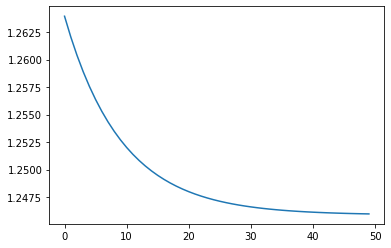

In [115]:
plt.plot(losses)

In [116]:
# Calculates accuracy of test data
def accuracy(y, y_pred):
    #correctness = dict()
    #for class in CLASSNAMES:
    #    gradientDict[class] = 0

    total_correct = 0
    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = y_pred.argmax(y_pred, axis=0)

        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return total_accuracy


In [117]:
# Accuracy check (WORK IN PROGRESS)
z = class_corr(w, b, x_test)
y_pred = softmax(z)

model_acc = accuracy(y_test, y_pred)
model_acc

TypeError: only integer scalar arrays can be converted to a scalar index